**Human Activity Recognition by Smartphone & Smartwatch Kinematic Sensors**

Exploratory Data Analysis of raw data (time series sensors data)

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [48]:
activity_codes_mapping = { 'B': 'jogging',
                           'D': 'sitting',
                         }

activity_color_map = {
                      activity_codes_mapping['B']: 'limegreen',
                      activity_codes_mapping['D']: 'orange',
                      }

In [134]:
def show_accel_per_activity(device, df, activities, attribute, interval_in_sec = None):
    ''' Plots acceleration time history per activity '''

    fig, ax = plt.subplots(figsize=(25, 7))  # Create a figure and axis

    for act in activities:
        df1 = df.loc[df.activity == act].copy()
        df1.reset_index(drop = True, inplace = True)
        df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 

        if interval_in_sec == None:
            df1[:].plot(kind='line', x='duration', y=[attribute], ax=ax, grid=True, color=activity_color_map[act])
        else:
            df1[:interval_in_sec*20].plot(kind='line', x='duration', y=[attribute], ax=ax, grid=True, color=activity_color_map[act])

    ax.set_xlabel('duration  (sec)', fontsize=15)
    ax.set_ylabel('acceleration  (m/sec^2)', fontsize=15)
    ax.set_title( attribute + ' axis acceleration for participant 1.   Device: ' + device, fontsize = 15)  # Keep a single title
    ax.legend(activities)  # Add a legend to distinguish activities
    # Changes to remove background color and set grid lines
    fig.patch.set_facecolor('white')  # Set figure background to white
    ax.set_facecolor('white')  # Set axis background to white

    # Grid lines with gray color and slightly lowered opacity
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7) 

Visualization of the time-series raw data for individual participants

**1) Phone - Acceleration measurement data**

In [86]:
raw_par_1_phone_accel = pd.read_csv('./wisdm-dataset/raw/phone/accel/data_1600_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_1_phone_accel.z = raw_par_1_phone_accel.z.str.strip(';')
raw_par_1_phone_accel.z = pd.to_numeric(raw_par_1_phone_accel.z)

raw_par_1_phone_accel['activity'] = raw_par_1_phone_accel['activity_code'].map(activity_codes_mapping)

raw_par_1_phone_accel = raw_par_1_phone_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x','y','z']]



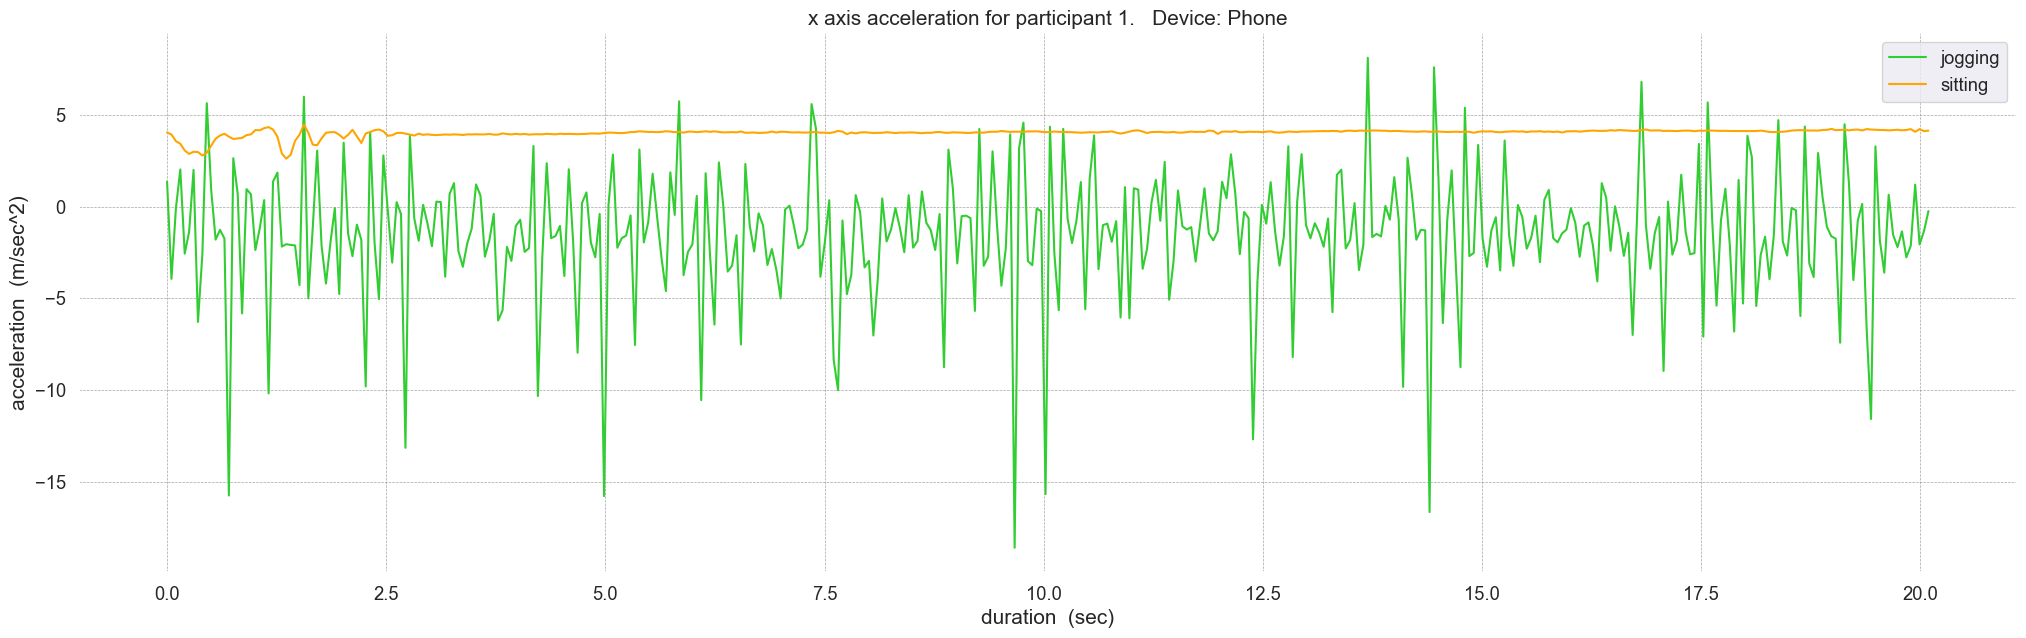

In [135]:
activities_to_plot = list(activity_codes_mapping.values()) # List of activities
show_accel_per_activity('Phone', raw_par_1_phone_accel, activities_to_plot,'x', 20)

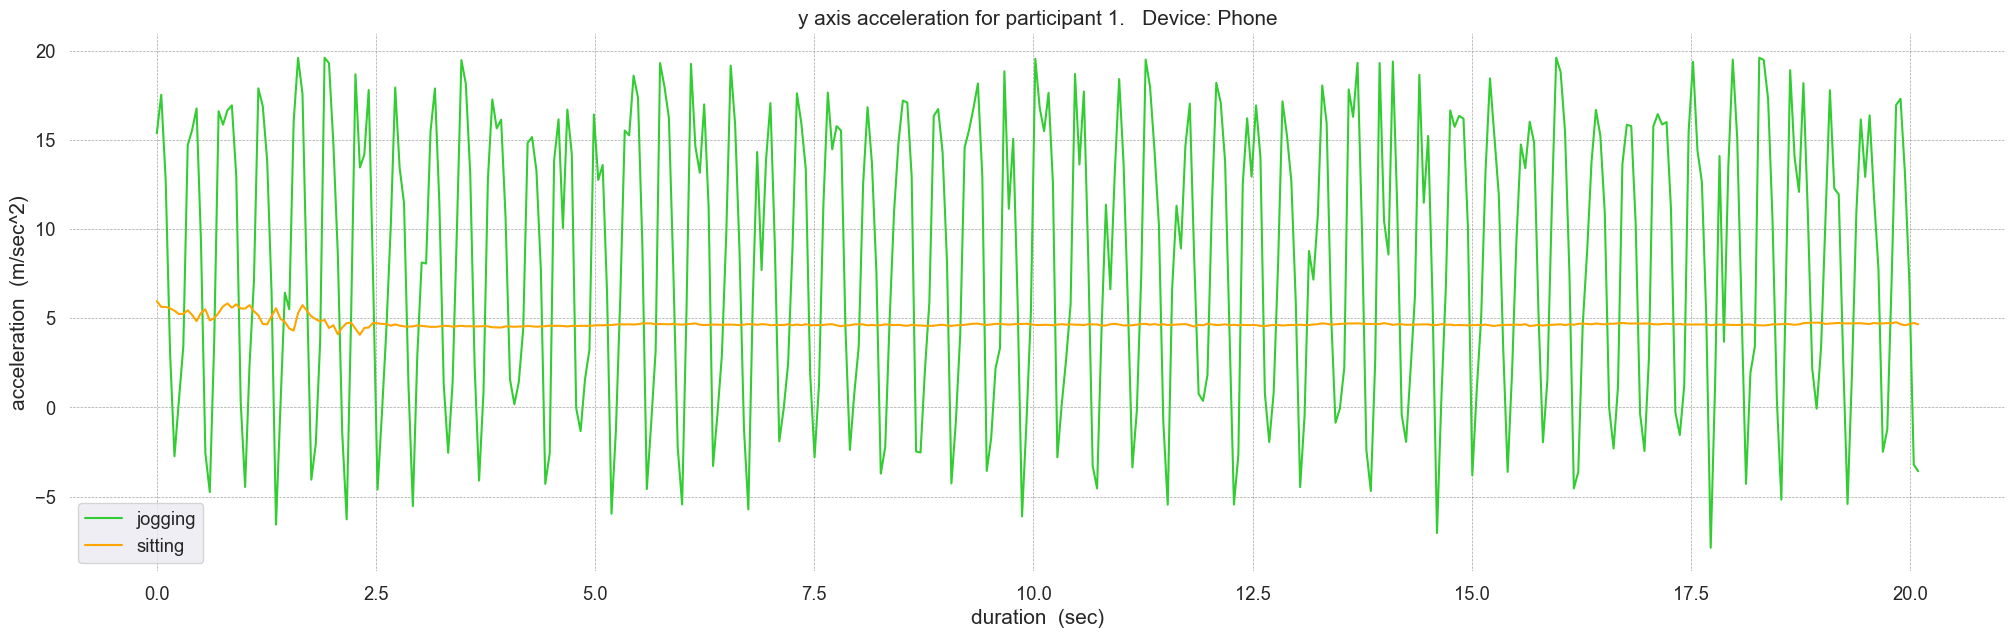

In [136]:
activities_to_plot = list(activity_codes_mapping.values()) # List of activities
show_accel_per_activity('Phone', raw_par_1_phone_accel, activities_to_plot,'y', 20)

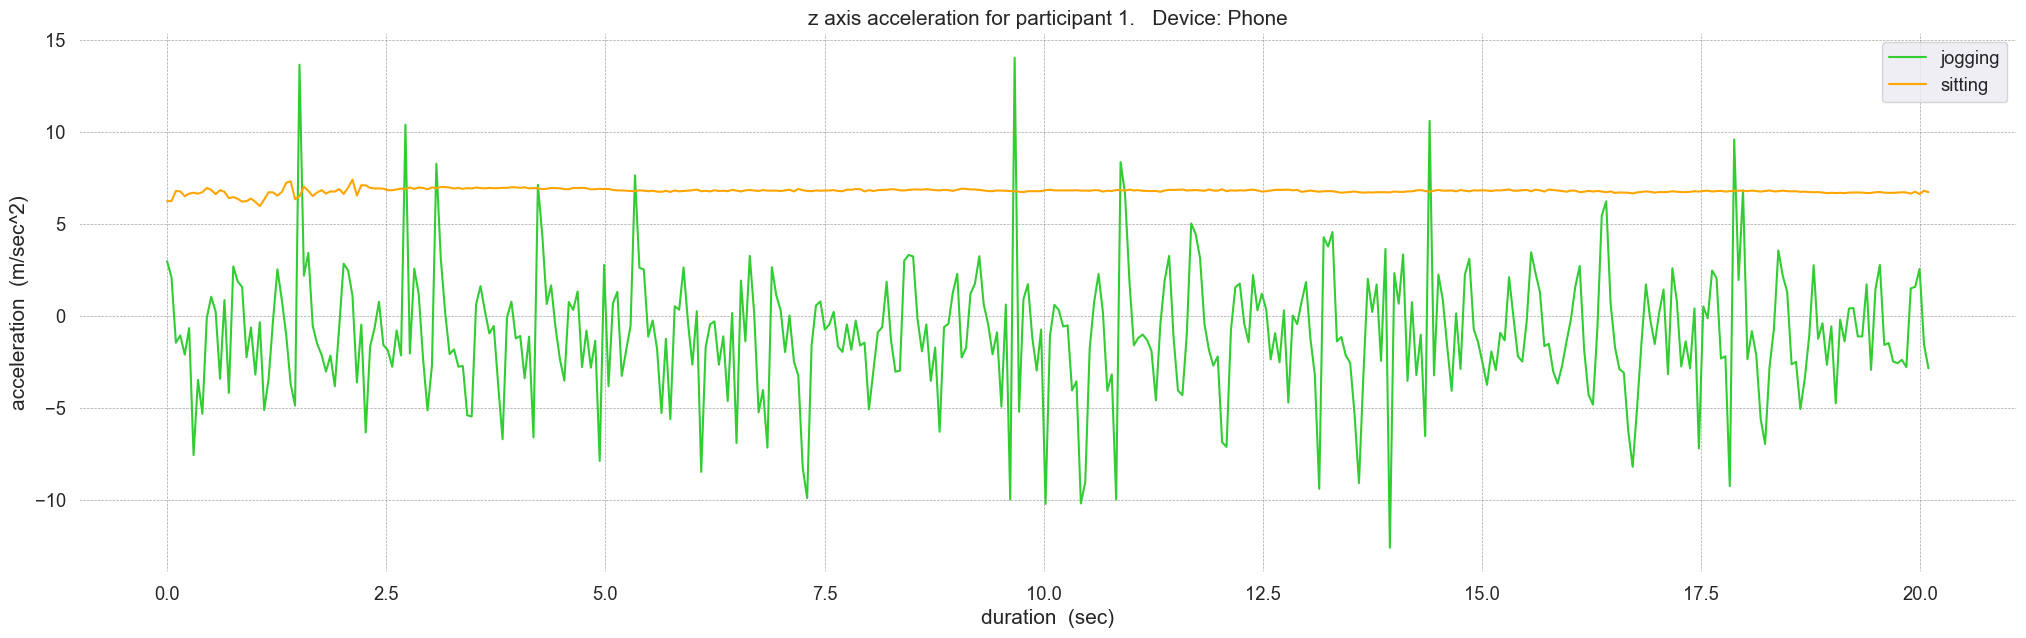

In [137]:
activities_to_plot = list(activity_codes_mapping.values()) # List of activities
show_accel_per_activity('Phone', raw_par_1_phone_accel, activities_to_plot,'z', 20)

**Features definition and Construction:**

In [4]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [27]:
## For participant 20 phone - accelerometer

fn = './wisdm-dataset/arff_files/phone/accel/data_1620_accel_phone.arff'
par_20_phone_accel_df = pd.read_csv(fn, names = features, skiprows = 96, index_col=None, header=0)
par_20_phone_accel_df['ACT'] = par_20_phone_accel_df['ACTIVITY'].map(activity_codes_mapping)


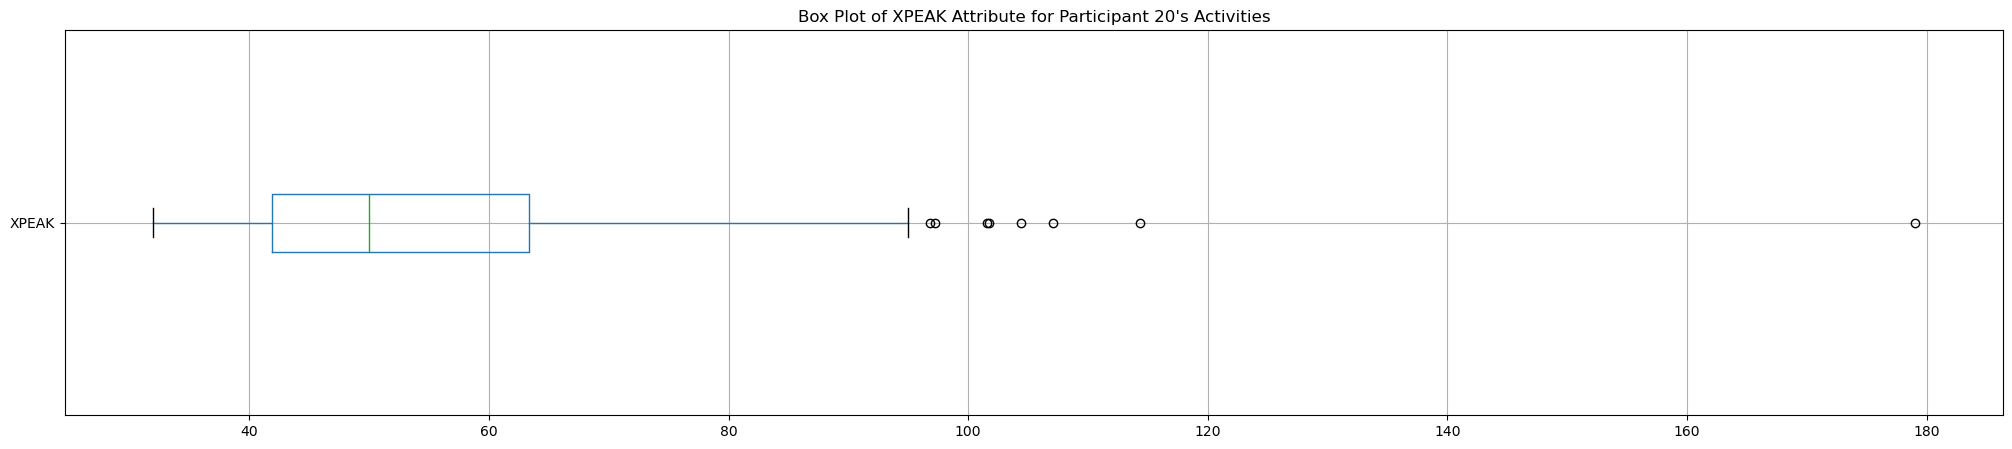

In [29]:
_ = par_20_phone_accel_df.boxplot(column=['XPEAK'], figsize=[25,5], vert=False)
plt.title("Box Plot of XPEAK Attribute for Participant 20's Activities")

# Show the plot
plt.show()

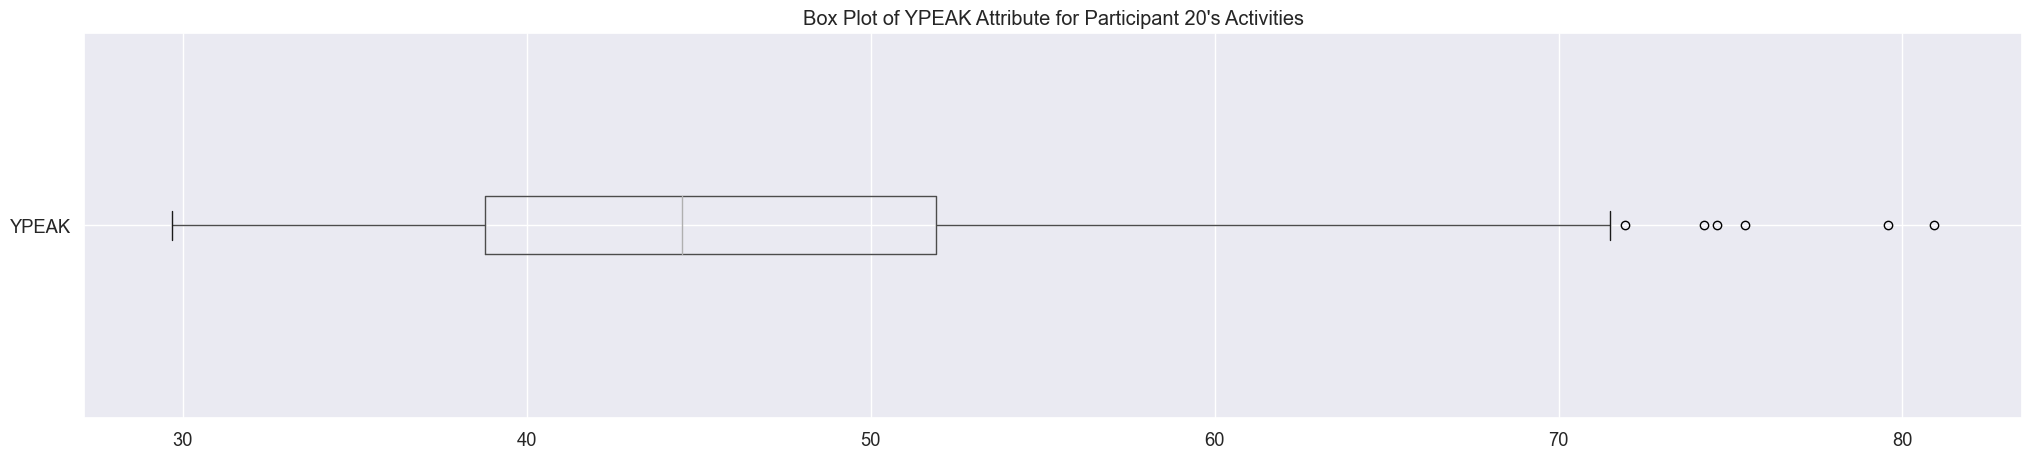

In [151]:
_ = par_20_phone_accel_df.boxplot(column=['YPEAK'], figsize=[25,5], vert=False)
plt.title("Box Plot of YPEAK Attribute for Participant 20's Activities")

# Show the plot
plt.show()

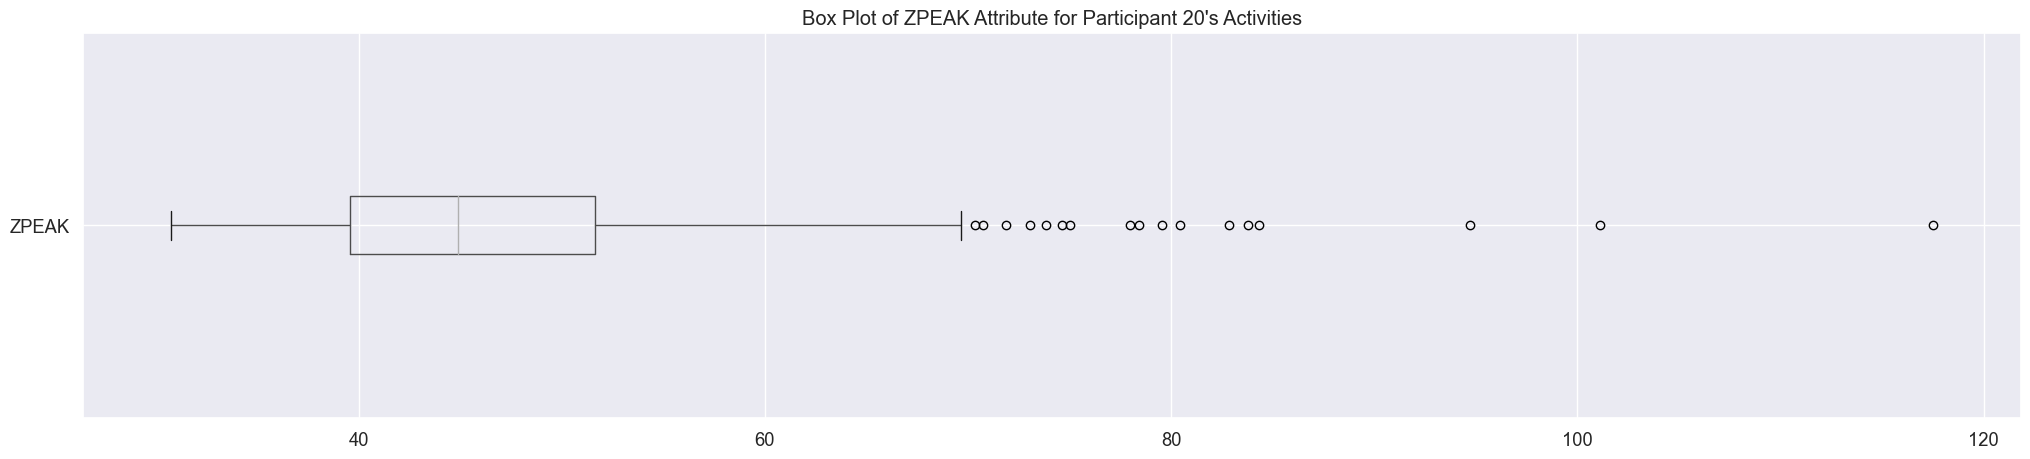

In [152]:
_ = par_20_phone_accel_df.boxplot(column=['ZPEAK'], figsize=[25,5], vert=False)
plt.title("Box Plot of ZPEAK Attribute for Participant 20's Activities")

# Show the plot
plt.show()

In [165]:
upper_threshold_XPEAK = par_20_phone_accel_df.XPEAK.mean() + 5*par_20_phone_accel_df.XPEAK.std()
upper_threshold_XPEAK

126.56505836737443

In [166]:
par_20_phone_accel_df = par_20_phone_accel_df[par_20_phone_accel_df.XPEAK < upper_threshold_XPEAK].copy()

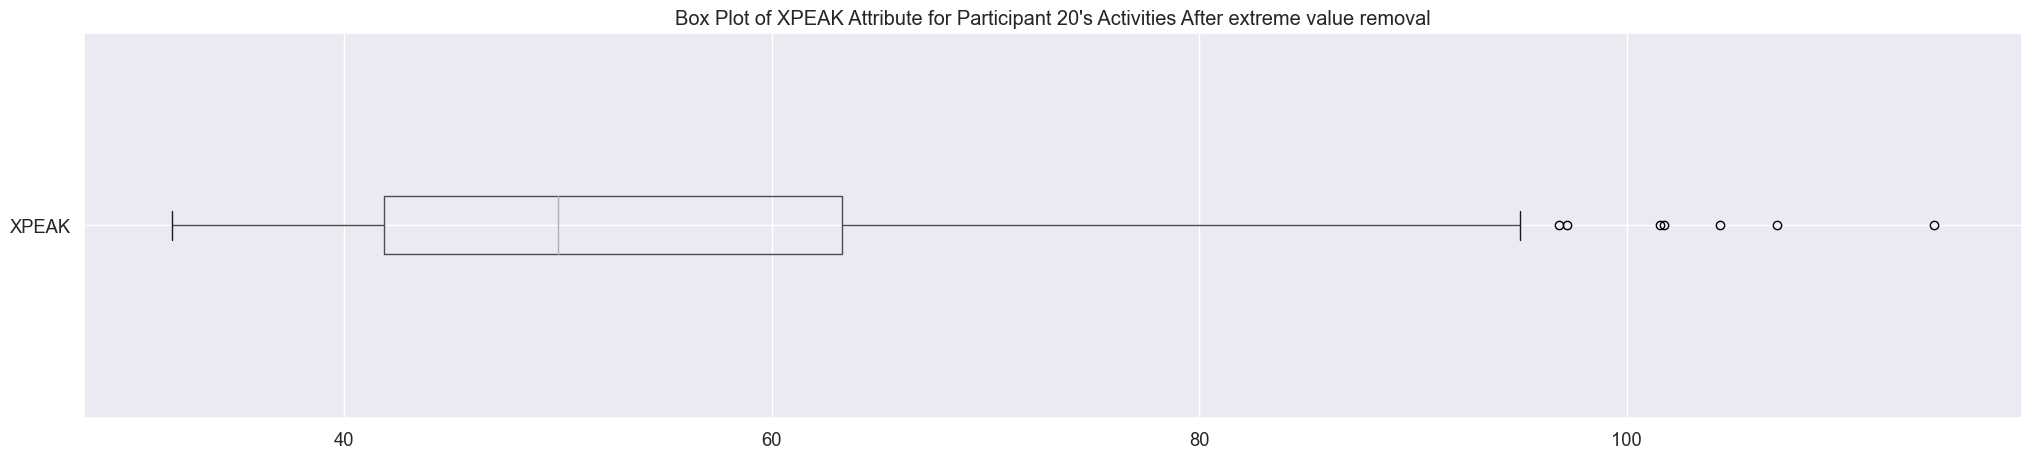

In [167]:
_ = par_20_phone_accel_df.boxplot(column=['XPEAK'], figsize=[25,5], vert=False)
plt.title("Box Plot of XPEAK Attribute for Participant 20's Activities After extreme value removal")

# Show the plot
plt.show()

# Visualizing the clustering pattern via t-SNE algorithm (for individual participants)

In [25]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'
                          }


activity_intensity_mapping = {'A': 'medium', 'B': 'high', 'C': 'high', 'D': 'low', 'E': 'low', 'F': 'low', 'G': 'medium', 'H': 'medium', 'I': 'medium', 'J': 'medium', 'K': 'medium', 'L': 'low', 'M': 'high', 'O': 'low', 'P': 'high', 'Q': 'low', 'R': 'medium', 'S': 'medium'}


low_intensity_color = 'lightgreen'
medium_intensity_color = 'gold'
high_intensity_color = 'red'



activity_color_map = {
    'low': low_intensity_color,
    'medium': medium_intensity_color,
    'high': high_intensity_color
}


In [53]:
activity_codes_mapping = { 'B': 'jogging',
                           'D': 'sitting',
                            'J': 'eating pasta',
                         }

In [1]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import mplcursors

from matplotlib.lines import Line2D

# Function to create custom legend handler
def create_legend_label(activity_code, intensity_level):
    color = activity_color_map[intensity_level]
    return Line2D([0], [0], marker='o', color='w', label=activity_codes_mapping[activity_code], markerfacecolor=color, markersize=10)


def plot_tSNE(X, y, fig_size):
    tsne = TSNE(n_components=2, random_state=300)
    X_2d = tsne.fit_transform(X)
    intensity_levels = ('high', 'medium', 'low')

    plt.figure(figsize=(fig_size, fig_size))

    scatter_plots = []

    for intensity_level in intensity_levels:
        intensity_indices = [index for index, activity_code in enumerate(y) if activity_intensity_mapping[activity_code] == intensity_level]
        scatter_plot = plt.scatter(X_2d[intensity_indices, 0], X_2d[intensity_indices, 1], c=activity_color_map[intensity_level], label=intensity_level)
        scatter_plots.append(scatter_plot)

    mplcursors.cursor(scatter_plots).connect("add", lambda sel: sel.annotation.set_text(', '.join([activity_codes_mapping[y[ind]] for ind in sel.target.index])))

    legend_handles = [create_legend_label(activity_code, intensity_level) for intensity_level in intensity_levels for activity_code in activity_intensity_mapping if activity_intensity_mapping[activity_code] == intensity_level]
    plt.legend(handles=legend_handles)
    plt.title('t-SNE Visualisation of Participant 20 phone accelerometer data')
    plt.xlabel('Principal Component 1')  
    plt.ylabel('Principal Component 2') 
    plt.show()

In [176]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA
def plot_pca(X, y, fig_size):
    pca = PCA(n_components=2, random_state=300)
    X_2d_pca = pca.fit_transform(X)
    intensity_levels = ('high', 'medium', 'low')

    plt.figure(figsize=(fig_size, fig_size))

    scatter_plots = []

    for intensity_level in intensity_levels:
        intensity_indices = [index for index, activity_code in enumerate(y) if activity_intensity_mapping[activity_code] == intensity_level]
        scatter_plot = plt.scatter(X_2d_pca[intensity_indices, 0], X_2d_pca[intensity_indices, 1], c=activity_color_map[intensity_level], label=intensity_level)
        scatter_plots.append(scatter_plot)

    mplcursors.cursor(scatter_plots).connect("add", lambda sel: sel.annotation.set_text(', '.join([activity_codes_mapping[y[ind]] for ind in sel.target.index])))

    legend_handles = [create_legend_label(activity_code, intensity_level) for intensity_level in intensity_levels for activity_code in activity_intensity_mapping if activity_intensity_mapping[activity_code] == intensity_level]
    plt.legend(handles=legend_handles)
    
    plt.title('PCA Visualisation of Participant 20 phone accelerometer data')  
    plt.xlabel('Principal Component 1')  
    plt.ylabel('Principal Component 2')  
    
    plt.show()

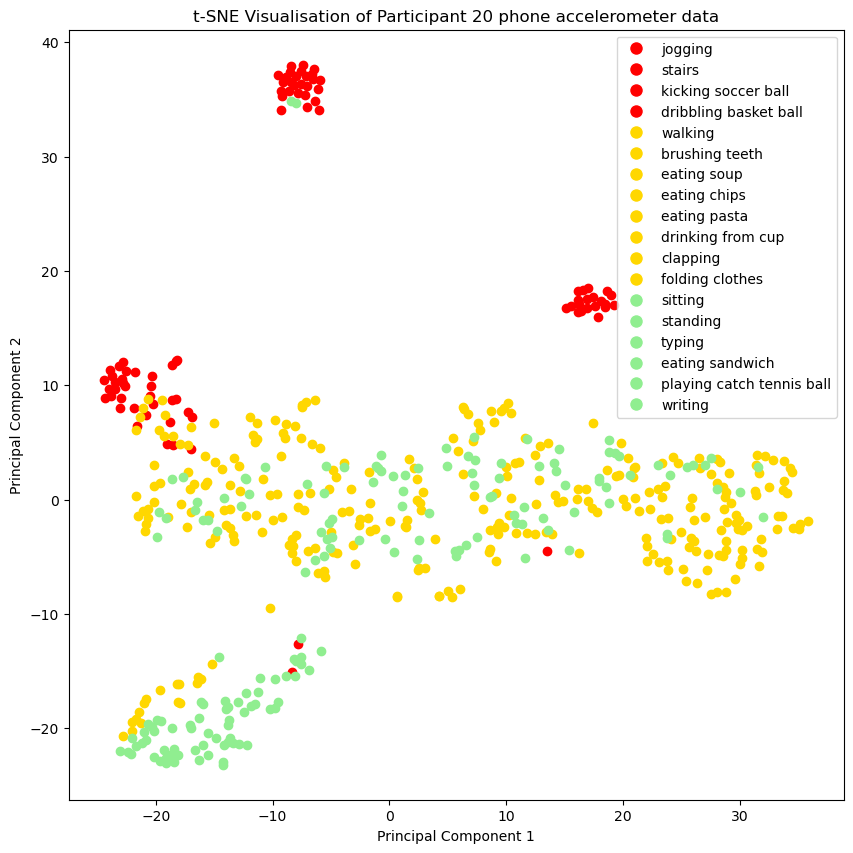

In [146]:
## For participant 20 phone - accelerometer

yy = par_20_phone_accel_df.ACTIVITY
XX = par_20_phone_accel_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)
plot_tSNE(XX, yy, 10)

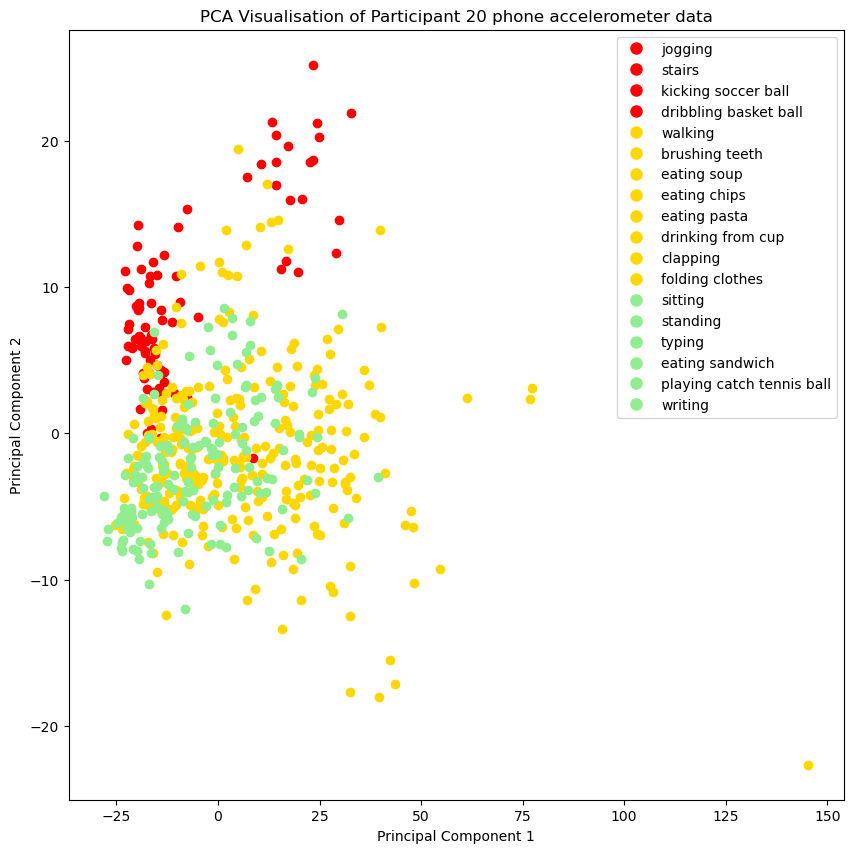

In [147]:
yy = par_20_phone_accel_df.ACTIVITY
XX = par_20_phone_accel_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)
plot_pca(XX, yy, 10)

In [177]:
from sklearn.decomposition import KernelPCA

kernel = 'rbf'

def plot_kpca(X, y, fig_size):
    kpca = KernelPCA(n_components=2,kernel=kernel ,random_state=300)
    X_2d_kpca = kpca.fit_transform(X)
    intensity_levels = ('high', 'medium', 'low')

    plt.figure(figsize=(fig_size, fig_size))

    scatter_plots = []

    for intensity_level in intensity_levels:
        intensity_indices = [index for index, activity_code in enumerate(y) if activity_intensity_mapping[activity_code] == intensity_level]
        scatter_plot = plt.scatter(X_2d_kpca[intensity_indices, 0], X_2d_kpca[intensity_indices, 1], c=activity_color_map[intensity_level], label=intensity_level)
        scatter_plots.append(scatter_plot)

    mplcursors.cursor(scatter_plots).connect("add", lambda sel: sel.annotation.set_text(', '.join([activity_codes_mapping[y[ind]] for ind in sel.target.index])))

    legend_handles = [create_legend_label(activity_code, intensity_level) for intensity_level in intensity_levels for activity_code in activity_intensity_mapping if activity_intensity_mapping[activity_code] == intensity_level]
    plt.legend(handles=legend_handles)
    
    plt.title('PCA Visualisation of Participant 20 phone accelerometer data')  
    plt.xlabel('Principal Component 1')  
    plt.ylabel('Principal Component 2')  
    
    plt.show()

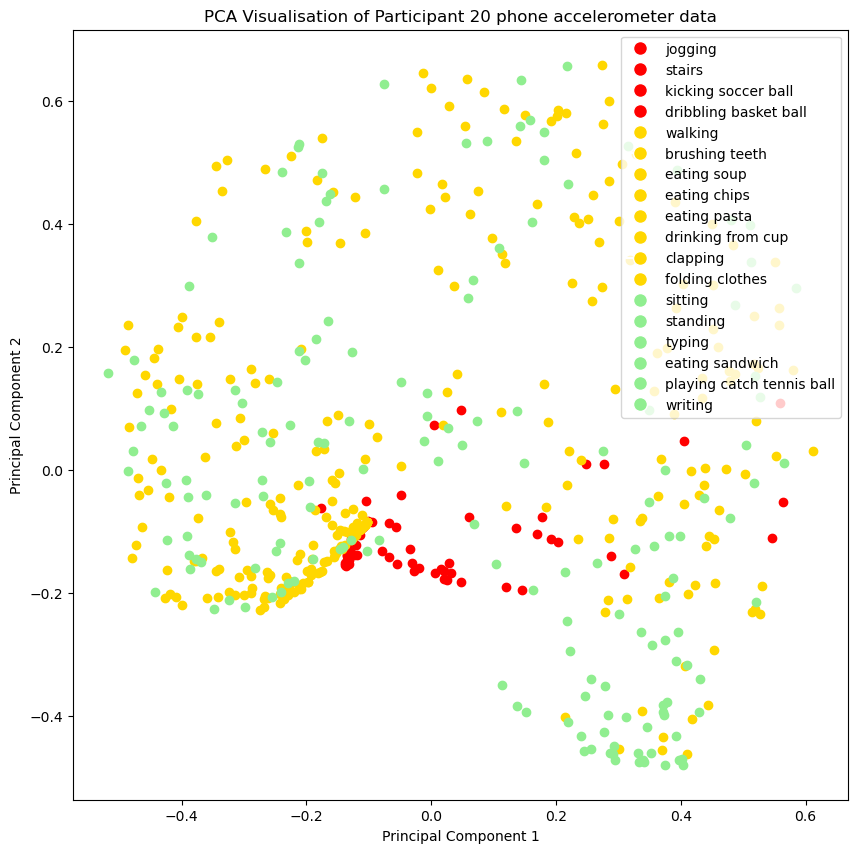

In [178]:
yy = par_20_phone_accel_df.ACTIVITY
XX = par_20_phone_accel_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)
plot_kpca(XX, yy, 10)

In [6]:
import glob

#the duplicate files to be ignored; all identical to 1600
# duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = './wisdm-dataset/arff_files/watch/accel'
all_files = glob.glob(path + "/*.arff")

list_dfs_watch_accel = []

for filename in all_files:

    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_watch_accel.append(df)

all_watch_accel = pd.concat(list_dfs_watch_accel, axis=0, ignore_index=True, sort=False)

all_watch_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.000,0.000,0.010,0.050,0.230,0.185,0.125,0.160,0.120,...,0.511396,0.504824,-0.653107,-0.177665,0.047484,-0.128490,-0.172721,-0.044635,12.90690,1604
1,A,0.000,0.005,0.045,0.060,0.185,0.175,0.130,0.125,0.145,...,0.494735,0.488377,-0.650797,-0.147216,0.100347,-0.185259,-0.439753,0.170373,12.92930,1604
2,A,0.000,0.025,0.040,0.060,0.160,0.180,0.110,0.170,0.120,...,0.509960,0.503407,-0.620292,-0.136585,0.185728,-0.245739,-0.443186,0.280749,12.99140,1604
3,A,0.000,0.000,0.000,0.080,0.185,0.155,0.140,0.120,0.120,...,0.434896,0.429308,-0.634005,-0.277457,-0.013385,-0.081120,-0.215224,-0.210576,13.34430,1604
4,A,0.000,0.000,0.000,0.035,0.175,0.245,0.175,0.100,0.135,...,0.413204,0.407894,-0.660106,-0.167239,0.020139,-0.001829,-0.190008,-0.078624,12.91970,1604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18206,S,0.515,0.200,0.055,0.060,0.150,0.010,0.005,0.005,0.000,...,0.574706,0.567321,0.108787,0.321117,0.266282,-0.390271,0.242826,-0.126560,10.26380,1608
18207,S,0.370,0.185,0.175,0.105,0.115,0.025,0.010,0.005,0.005,...,0.607382,0.599577,-0.066037,0.354323,0.199830,-0.291614,0.351679,-0.190435,10.38890,1608
18208,S,0.360,0.210,0.140,0.090,0.170,0.025,0.005,0.000,0.000,...,0.508000,0.501472,-0.068067,-0.382943,-0.439075,-0.156918,-0.461164,0.207451,9.95679,1608
18209,S,0.595,0.130,0.110,0.060,0.105,0.000,0.000,0.000,0.000,...,0.537339,0.530434,0.332232,0.306526,0.515654,-0.261522,0.018772,-0.494163,10.08120,1608


**Outliers detection: in XPEAK, YPEAK, ZPEAK by inspection of the histogram/boxplot:**

From histograms inspection it seems that there are few extreme values in the PEAK related features, so, they will be removed:

In [7]:
upper_threshold_XPEAK = all_watch_accel.XPEAK.mean() + 9*all_watch_accel.XPEAK.std()
upper_threshold_XPEAK

189.78638193390148

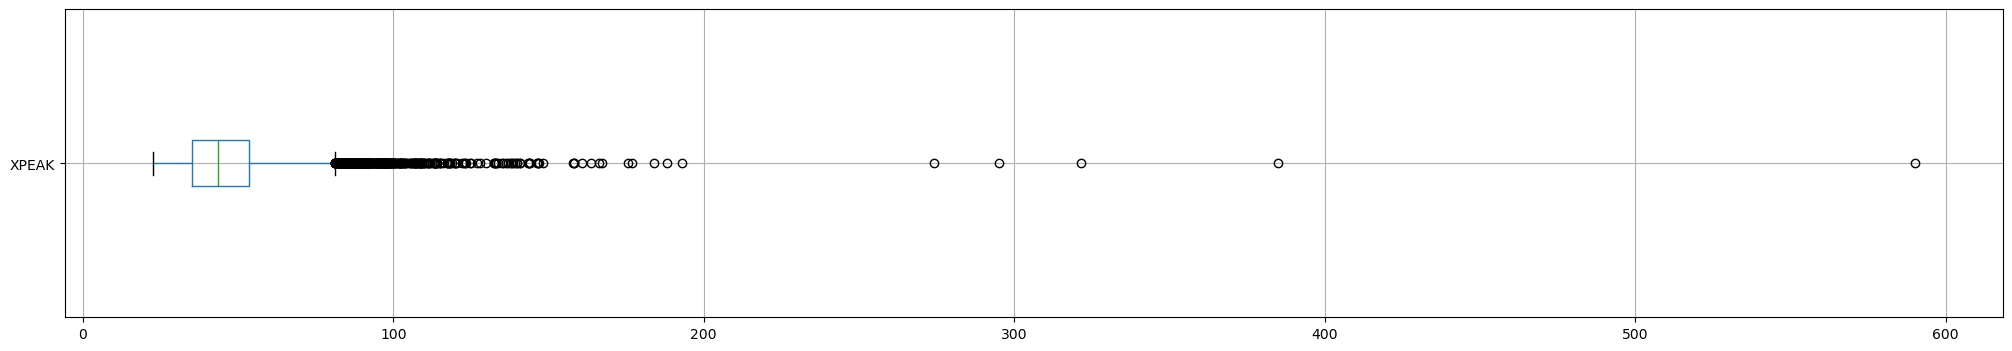

In [8]:
_ = all_watch_accel.boxplot(column=['XPEAK'], figsize=[25,4], vert=False)

In [9]:
all_watch_accel = all_watch_accel[all_watch_accel.XPEAK < upper_threshold_XPEAK].copy()

In [10]:
_ = all_watch_accel.boxplot(column=['YPEAK'], figsize=[25,4], vert=False)

In [ ]:
# The following columns:'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV' ,'XVAR', 'YVAR', 'ZVAR' are suspected to contain erroneous data: ( e.g. absolute deviation is not of the same order of magnitude of standard deviation; variance is not the square of standard deviation !!!)

In [19]:
all_watch_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()

,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR
0,4.08345,3.57665,1.80605,0.335398,0.304497,0.177172,0.579136,0.551812,0.420918
1,4.42032,3.27986,2.13734,0.366253,0.283828,0.214537,0.605188,0.532755,0.463182
2,4.58310,3.49951,2.25952,0.380050,0.302666,0.239668,0.616482,0.550151,0.489559
3,4.46455,3.61892,1.40289,0.359684,0.298461,0.122940,0.599737,0.546316,0.350628
4,3.73440,3.18150,1.44562,0.310961,0.267417,0.124528,0.557638,0.517124,0.352885


In [11]:
all_watch_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1, inplace = True)

In [12]:
#drop all perticipants 
all_watch_accel.drop('PARTICIPANT', axis = 1, inplace = True)

In [13]:
all_watch_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,A,0.000,0.000,0.010,0.050,0.230,0.185,0.125,0.160,0.120,...,0.517420,0.511396,0.504824,-0.653107,-0.177665,0.047484,-0.128490,-0.172721,-0.044635,12.90690
1,A,0.000,0.005,0.045,0.060,0.185,0.175,0.130,0.125,0.145,...,0.500562,0.494735,0.488377,-0.650797,-0.147216,0.100347,-0.185259,-0.439753,0.170373,12.92930
2,A,0.000,0.025,0.040,0.060,0.160,0.180,0.110,0.170,0.120,...,0.515967,0.509960,0.503407,-0.620292,-0.136585,0.185728,-0.245739,-0.443186,0.280749,12.99140
3,A,0.000,0.000,0.000,0.080,0.185,0.155,0.140,0.120,0.120,...,0.440019,0.434896,0.429308,-0.634005,-0.277457,-0.013385,-0.081120,-0.215224,-0.210576,13.34430
4,A,0.000,0.000,0.000,0.035,0.175,0.245,0.175,0.100,0.135,...,0.418071,0.413204,0.407894,-0.660106,-0.167239,0.020139,-0.001829,-0.190008,-0.078624,12.91970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18206,S,0.515,0.200,0.055,0.060,0.150,0.010,0.005,0.005,0.000,...,0.581476,0.574706,0.567321,0.108787,0.321117,0.266282,-0.390271,0.242826,-0.126560,10.26380
18207,S,0.370,0.185,0.175,0.105,0.115,0.025,0.010,0.005,0.005,...,0.614536,0.607382,0.599577,-0.066037,0.354323,0.199830,-0.291614,0.351679,-0.190435,10.38890
18208,S,0.360,0.210,0.140,0.090,0.170,0.025,0.005,0.000,0.000,...,0.513984,0.508000,0.501472,-0.068067,-0.382943,-0.439075,-0.156918,-0.461164,0.207451,9.95679
18209,S,0.595,0.130,0.110,0.060,0.105,0.000,0.000,0.000,0.000,...,0.543668,0.537339,0.530434,0.332232,0.306526,0.515654,-0.261522,0.018772,-0.494163,10.08120


In [54]:
df_filtered = all_watch_accel[all_watch_accel['ACTIVITY'].isin(['B', 'D', 'J'])]

In [55]:
df_filtered

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
18,B,0.240,0.040,0.07,0.080,0.080,0.080,0.160,0.105,0.075,...,0.656317,0.648676,0.640340,-0.234943,-0.310274,0.442276,0.165913,-0.340209,0.519367,15.16930
19,B,0.355,0.035,0.02,0.030,0.035,0.035,0.145,0.185,0.060,...,0.661668,0.653965,0.645561,-0.173361,-0.523716,0.609242,0.151377,-0.453266,0.560167,16.53110
20,B,0.325,0.025,0.04,0.030,0.025,0.030,0.085,0.175,0.145,...,0.677789,0.669898,0.661290,-0.105396,-0.553335,0.620932,0.251100,-0.461188,0.543212,17.43260
21,B,0.330,0.035,0.04,0.025,0.015,0.025,0.060,0.140,0.170,...,0.688062,0.680052,0.671313,-0.087684,-0.583641,0.597884,0.256314,-0.503259,0.515426,18.52750
22,B,0.335,0.030,0.03,0.005,0.025,0.015,0.050,0.200,0.120,...,0.708199,0.699954,0.690960,-0.111727,-0.509120,0.538420,0.230938,-0.421796,0.457269,18.44500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18062,J,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.361538,0.357329,0.352737,0.887236,-0.396394,-0.447785,-0.398125,0.581523,0.376728,9.86580
18063,J,0.955,0.045,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.350038,0.345963,0.341517,0.929180,-0.029634,-0.300961,-0.819893,0.715541,-0.652313,9.85392
18064,J,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.359670,0.355483,0.350915,0.904775,-0.207561,-0.165438,-0.213953,0.521204,0.534528,9.85239
18065,J,0.960,0.040,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.325705,0.321913,0.317777,0.907342,0.768737,0.562533,-0.867935,0.614332,-0.808276,9.85222


In [56]:
from sklearn.model_selection import train_test_split


y = df_filtered.ACTIVITY
X = df_filtered.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = df_filtered.ACTIVITY)

In [57]:
y_train

5153     B
6170     D
10654    J
9083     D
3540     D
        ..
7921     J
12958    D
7929     J
9753     J
8123     D
Name: ACTIVITY, Length: 2247, dtype: object

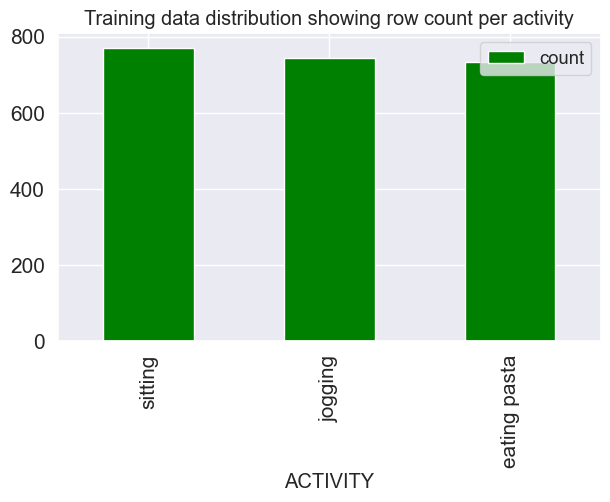

In [80]:
_ = y_train.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (7,4), color = 'green', title = 'Training data distribution showing row count per activity', legend = True, fontsize = 15)
plt.show()

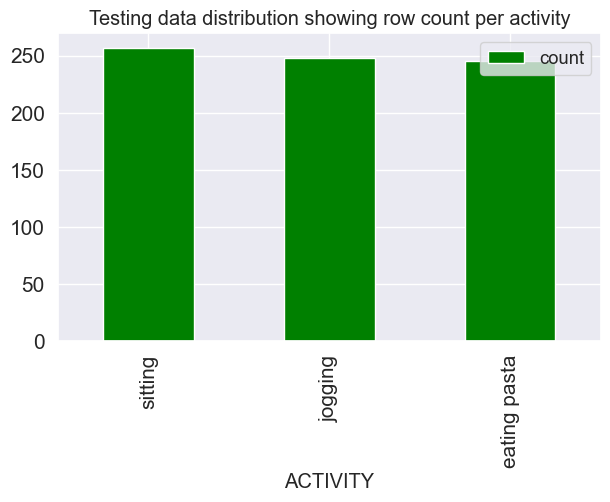

In [81]:
_ = y_test.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (7,4), color = 'green', title = 'Testing data distribution showing row count per activity', legend = True, fontsize = 15)
plt.show()

In [82]:
y_test

16622    D
9085     D
2494     D
3491     B
4836     B
        ..
14623    J
10323    J
348      B
3633     J
5296     J
Name: ACTIVITY, Length: 750, dtype: object

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


In [40]:

from sklearn.model_selection import StratifiedShuffleSplit


my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
my_param_grid = {'bootstrap': [True], 
                 'n_estimators': [50, 100, 200], 
                 'oob_score': [True, False], 
                 'warm_start': [True, False]}
rf_model_gs = GridSearchCV(estimator = rf_classifier, 
                           param_grid = my_param_grid, 
                           scoring = 'accuracy',
                           cv = my_cv)
rf_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': [50, 100, 200],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [67]:
rf_best_classifier = rf_model_gs.best_estimator_
rf_model_gs.cv_results_

{'mean_fit_time': array([0.32628503, 0.31122947, 0.30957842, 0.27992177, 0.581849  ,
        0.82003064, 0.57379532, 0.65206809, 1.13811374, 1.18222952,
        1.07509241, 1.10405283]),
 'std_fit_time': array([0.03841679, 0.02221577, 0.03814759, 0.0275011 , 0.01841991,
        0.09375881, 0.04599349, 0.06326702, 0.02552818, 0.07313914,
        0.01557793, 0.06914715]),
 'mean_score_time': array([0.00804224, 0.00671878, 0.00706787, 0.00638161, 0.00993476,
        0.01654043, 0.01220903, 0.0144011 , 0.01855063, 0.01912994,
        0.01867385, 0.01884036]),
 'std_score_time': array([0.00442959, 0.0014501 , 0.00083367, 0.00056559, 0.00015604,
        0.00485654, 0.00315083, 0.0044532 , 0.00055647, 0.00119828,
        0.00017513, 0.00084655]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True, True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, F

In [68]:
rf_best_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': True}

In [69]:
y_train_pred = rf_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))
accuracy_score(y_true=y_train, y_pred=y_train_pred)



1.0

In [70]:
y_test_pred = rf_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

     0
0    D
1    D
2    B
3    B
4    B
..  ..
745  J
746  J
747  B
748  J
749  J

[750 rows x 1 columns]


In [71]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=rf_best_classifier.classes_,
                      columns=rf_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,jogging,sitting,eating pasta
jogging,246,1,1
sitting,3,237,17
eating pasta,0,10,235


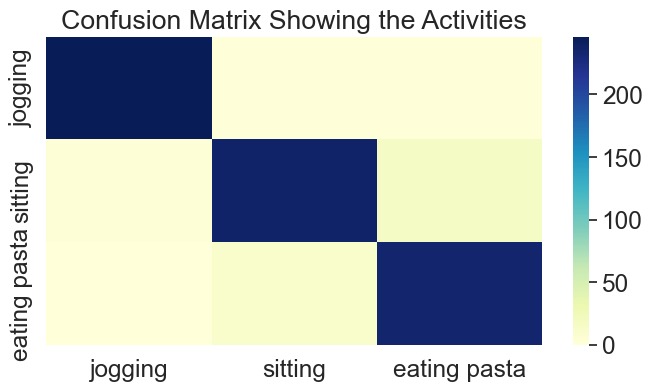

In [85]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.heatmap(cm_act, cmap="YlGnBu")
plt.title("Confusion Matrix Showing the Activities") 
plt.show()

In [76]:
sns.set(font_scale=1.2)
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(3)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
jogging,0.991935
sitting,0.922179
eating pasta,0.959184


In [75]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99       248
           D       0.96      0.92      0.94       257
           J       0.93      0.96      0.94       245

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [77]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9573333333333334